Using TensorFlow backend.


4423680/4422102 [==============================] - 2s 0us/step
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 3s - loss: 0.5321 - accuracy: 0.4471 - val_loss: 0.4622 - val_accuracy: 0.4812
Epoch 2/10
 - 2s - loss: 0.4296 - accuracy: 0.4873 - val_loss: 0.4076 - val_accuracy: 0.4881
Epoch 3/10
 - 2s - loss: 0.3966 - accuracy: 0.4917 - val_loss: 0.3892 - val_accuracy: 0.4911
Epoch 4/10
 - 2s - loss: 0.3805 - accuracy: 0.4945 - val_loss: 0.3752 - val_accuracy: 0.4934
Epoch 5/10
 - 2s - loss: 0.3676 - accuracy: 0.4964 - val_loss: 0.3634 - val_accuracy: 0.4951
Epoch 6/10
 - 2s - loss: 0.3562 - accuracy: 0.4983 - val_loss: 0.3527 - val_accuracy: 0.4973
Epoch 7/10
 - 2s - loss: 0.3462 - accuracy: 0.5001 - val_loss: 0.3438 - val_accuracy: 0.4984
Epoch 8/10
 - 2s - loss: 0.3383 - accuracy: 0.5015 - val_loss: 0.3369 - val_accuracy: 0.4999
Epoch 9/10
 - 2s - loss: 0.3323 - accuracy: 0.5024 - val_loss: 0.3317 - val_accuracy: 0.5006
Epoch 10/10
 - 2s - loss: 0.3277 - accuracy: 0.503

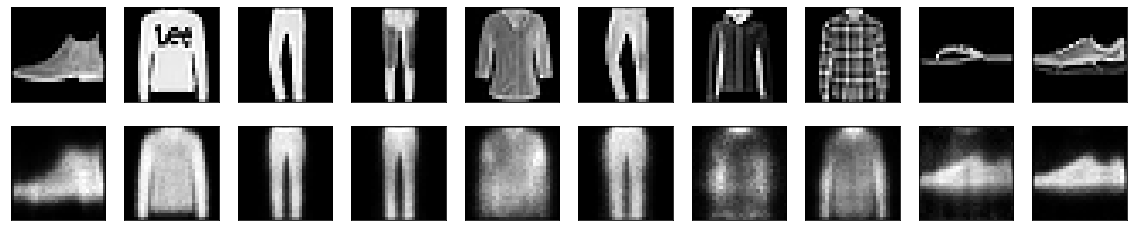

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation

encoder = Model(input_img, encoded)

#let's create a seperate decoder model
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))



autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencode=autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                verbose=2,
                validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


# use Matplotlib
import matplotlib.pyplot as plt
# displaying original and reconstructed image
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()